# Import

In [1]:
from sympy import *
from sympy.abc import x

# Вычисление первообразной $f(x)$

$$f(x) = \sqrt{1 + \sin(x)}$$
$$\left[ 1 + \sin x = \left( \cos \frac x 2 + \sin \frac x 2 \right)^2 \right]$$
$$f(x) = \left| \cos \frac x 2 + \sin \frac x 2 \right|$$

In [2]:
simplify(cos(x / 2) + sin(x / 2))

sqrt(2)*sin(x/2 + pi/4)

$$f(x) = \sqrt 2 \, \left| \sin \left( \frac x 2 + \frac \pi 4 \right) \right|$$

$$\left[ \int \left|\sin {ax}\right|\,dx={2 \over a}\left\lfloor {\frac {ax}{\pi }}\right\rfloor -{1 \over a}\cos {\left(ax-\left\lfloor {\frac {ax}{\pi }}\right\rfloor \pi \right)}+C \right]$$

\begin{align*}
F(x) &= \sqrt 2 \, \int \left| \sin \left( \frac x 2 + \frac \pi 4 \right) \right| dx \\
&= 2 \sqrt 2 \, \int \left| \sin \left( \frac x 2 + \frac \pi 4 \right) \right| d\left( \frac x 2 + \frac \pi 4 \right) \\
&= 2 \sqrt 2 \left( {2 \over a}\left\lfloor {\frac {ax}{\pi }}\right\rfloor -{1 \over a}\cos {\left(ax-\left\lfloor {\frac {ax}{\pi }}\right\rfloor \pi \right)} \right) \Bigg|_{\begin{aligned}a &= 1 \\ x &= \frac x 2 + \frac \pi 4\end{aligned}}
\end{align*}

Вычисление последнего выражения:

In [3]:
a_ = 1
x_ = x / 2 + pi / 4

int_abssinax = S(2) / a_ * floor(a_ * x_ / pi) \
             - S(1) / a_ * cos(a_ * x_ - floor(a_ * x_ / pi) * pi)

F_expr = expand(2 * sqrt(2) * int_abssinax)
F_expr

-2*sqrt(2)*cos(x/2 - pi*floor(x/(2*pi) + 1/4) + pi/4) + 4*sqrt(2)*floor(x/(2*pi) + 1/4)

# Проверка

Проверим с помощью сравнения символьного и численного решений определенного интеграла: 

$$I(x) = \int \limits_{x_0}^x f(t) \, dt$$

Символьное решение:

$$I(x) = F(x) - F(x_0)$$

Численное решение:

$$I(x_i^*) \approx S(x_i^*) = \sum _{j=1}^i f(x_j^*) \, \Delta x_j$$
$$\Delta x_i = x_i - x_{i-1}$$
$$x_i^* = \frac {x_i + x_{i-1}} {2}$$

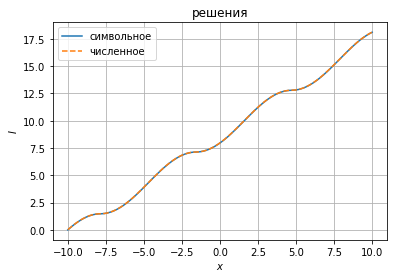

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.grid()
plt.title('решения')
plt.xlabel('$x$')
plt.ylabel('$I$')

from sympy.abc import x
F_expr_np = lambdify(x, F_expr, 'numpy')

x0 = -10

x = np.linspace(-10, 10, 100)
I = F_expr_np(x) - F_expr_np(x0)

plt.plot(x, I, label='символьное')


f_expr = lambda x: np.sqrt(1 + np.sin(x))

x = np.linspace(-10, 10, 1000)
h = x[1] - x[0]

x_ = (x[:-1] + x[1:]) / 2
S = np.cumsum(f_expr(x_) * h)

plt.plot(x_, S, '--', label='численное')

plt.legend();